In [2]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV


In [3]:
n_s= glob.glob("data/non_smile/*.jpg")

In [4]:
type(n_s)

list

In [5]:
n_s[0]

'data/non_smile\\Aaron_Eckhart_0001.jpg'

In [6]:
s= glob.glob("data/smile/*.jpg")

In [7]:
test= glob.glob("data/test/*.jpg")

In [8]:
len(s), len(n_s), len(test)

(600, 603, 12030)

In [9]:
#Data Cleaning

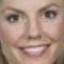

In [10]:
img= Image.open(s[27])
img

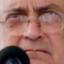

In [11]:
img= Image.open(n_s[8])
img

In [12]:
#converting to grayscale
px = Image.open(n_s[22]).convert("L")

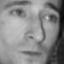

In [13]:
px

In [14]:
px.size

(64, 64)

In [15]:
pixel_array=np.array(px)

In [16]:
type(pixel_array)

numpy.ndarray

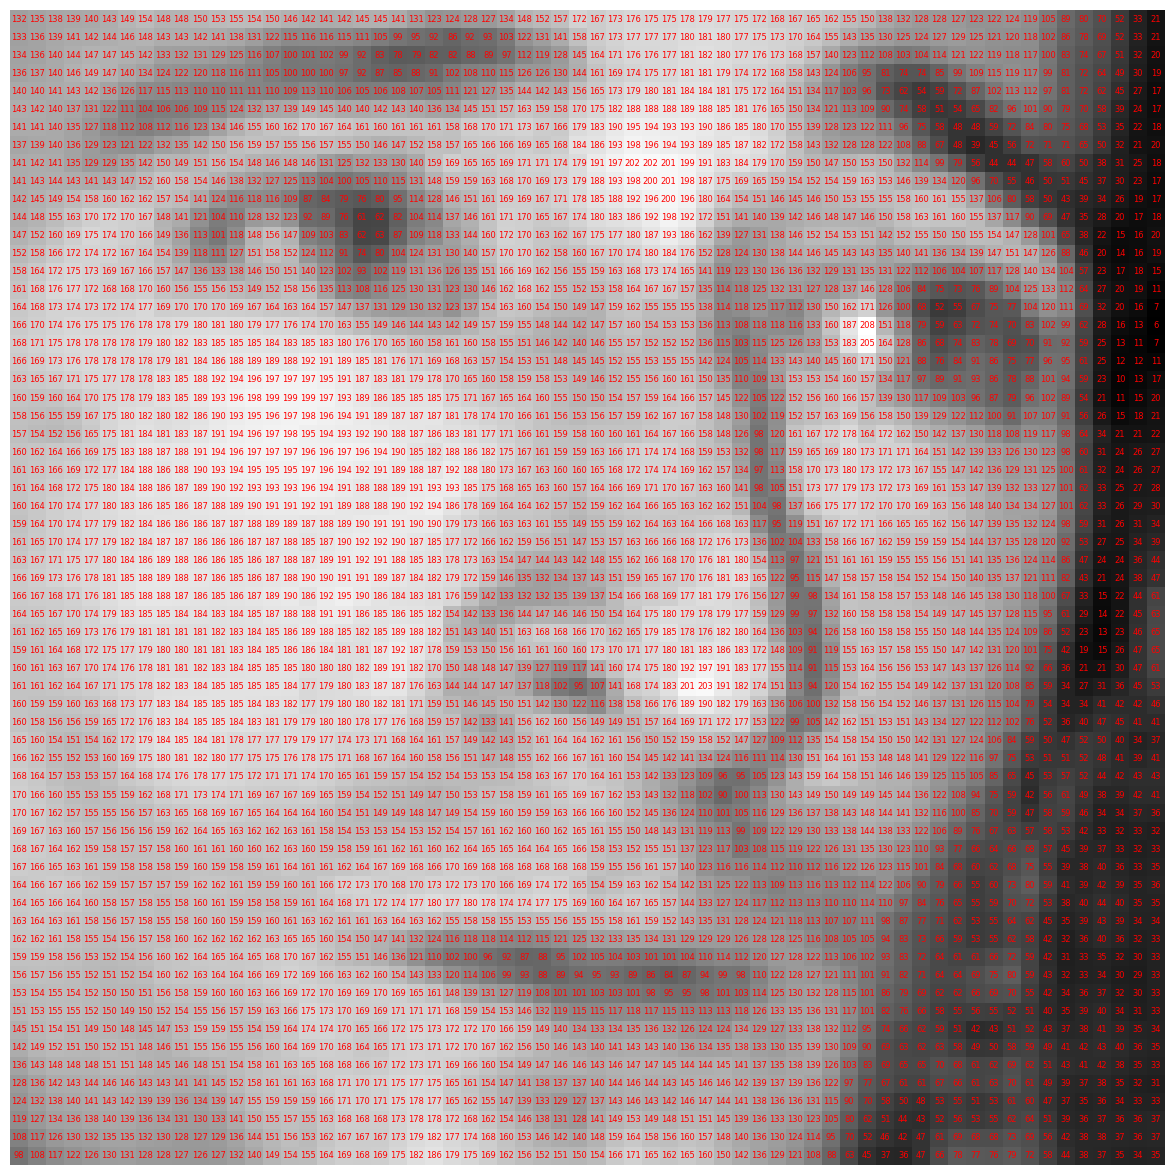

In [17]:
#giving image and pixel relationship

plt.figure(figsize=(15, 15))
plt.imshow(pixel_array, cmap="gray", interpolation="nearest")

for i in range(64):
    for j in range(64):
        plt.text(j, i, pixel_array[i, j], ha="center", va="center", fontsize=6, color="red")

plt.axis("off")
plt.show()

#because its gray scale no are less in dark areas


In [18]:
img=img.convert('L')

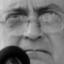

In [19]:
img

In [20]:
data=[]
labels=[]
#because its classification we are defining lables

In [21]:
for image in n_s:
    img=Image.open(image)
    img=img.convert('L')
    img=np.array(img).flatten()
    data.append(img)
    labels.append(0)
# im doing numpy flatten because of 3 dimesnsional issue in scalling so flatten converts 64,64=> 64*64 into 1 dimenisonal    

In [22]:
for image in s:
    img=Image.open(image)
    img=img.convert('L')
    img=np.array(img).flatten()
    data.append(img)
    labels.append(1)
    

In [23]:
len(data), len(labels)

(1203, 1203)

In [24]:
type(data)

list

In [25]:
type(data[0])

numpy.ndarray

In [26]:
type(labels[0])

int

In [27]:
#we need to convert data and labels in np array
x=np.array(data)
y=np.array(labels)
x

array([[136, 154, 164, ...,  64,  64,  64],
       [120, 124, 130, ...,  69,  67,  66],
       [ 24,  17,  27, ...,  11,   3,  11],
       ...,
       [114, 119, 126, ...,  92,  84,  62],
       [ 15,  11,   7, ...,   8,  10,   4],
       [124, 122, 119, ..., 212, 212, 218]], dtype=uint8)

In [28]:
# Model Development
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=42, shuffle=True)

In [29]:
type(x_train)

numpy.ndarray

In [30]:
x_train.shape

(902, 4096)

In [31]:
x_train[0]

array([ 25,  32,  52, ..., 116,  96,  62], dtype=uint8)

In [32]:

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [33]:
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [34]:
# x_train_scaled[0]
x_test_scaled[0]
#now its in equal normal distribution 

array([ 0.80828318,  0.78885349,  0.7405772 , ..., -0.44941079,
        0.6994134 ,  1.53830749])

In [35]:
model= LogisticRegression()
model.fit(x_train_scaled, y_train) 

C:\Users\santhosh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred= model.predict(x_test_scaled)

In [37]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]

In [38]:
model.predict_proba(x_test_scaled)
#here we can see output is 1 for 1st one so prob is 9,99
#for second prob is high in 0 
# for 3rd also its 0 so prob is high in 0)

array([[1.94562482e-06, 9.99998054e-01],
       [5.91187531e-01, 4.08812469e-01],
       [9.92359967e-01, 7.64003271e-03],
       [2.44918308e-10, 1.00000000e+00],
       [1.00000000e+00, 9.79988486e-12],
       [9.95728782e-01, 4.27121812e-03],
       [3.71928536e-07, 9.99999628e-01],
       [9.99860526e-01, 1.39473941e-04],
       [7.07852706e-08, 9.99999929e-01],
       [1.96974038e-04, 9.99803026e-01],
       [5.39475349e-03, 9.94605247e-01],
       [4.04135688e-08, 9.99999960e-01],
       [9.99999764e-01, 2.36231403e-07],
       [9.87646139e-01, 1.23538607e-02],
       [9.99999999e-01, 9.77567137e-10],
       [9.99999962e-01, 3.75954489e-08],
       [5.07023493e-03, 9.94929765e-01],
       [9.99841238e-01, 1.58761591e-04],
       [2.45260346e-08, 9.99999975e-01],
       [9.99993481e-01, 6.51945832e-06],
       [5.85807425e-09, 9.99999994e-01],
       [3.00086676e-03, 9.96999133e-01],
       [9.97523313e-01, 2.47668736e-03],
       [5.76629589e-09, 9.99999994e-01],
       [9.996736

In [39]:
accuracy= accuracy_score(y_test, y_pred)
print(f"Model accuracy:{accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

      


Model accuracy:0.8937
Confusion Matrix:
 [[140  18]
 [ 14 129]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       158
           1       0.88      0.90      0.89       143

    accuracy                           0.89       301
   macro avg       0.89      0.89      0.89       301
weighted avg       0.89      0.89      0.89       301



In [40]:
# Now lets do hyperparameter tuning
param={
    'penalty': ['l1','l2','elasticnet'],
        'C': [0.001,0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
                   }

In [41]:
log_reg= LogisticRegression()
cv = StratifiedKFold()
# Perform grid search
grid_search = GridSearchCV(log_reg, param, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

C:\Users\santhosh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\santhosh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\santhosh\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\santhosh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [42]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}

In [43]:
grid_search.best_score_

0.8902148557397176

In [44]:
tuned_model = grid_search.best_estimator_ 
#best model
y_pred = tuned_model.predict(x_test_scaled)
# 📌 Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9070
Confusion Matrix:
 [[143  15]
 [ 13 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       158
           1       0.90      0.91      0.90       143

    accuracy                           0.91       301
   macro avg       0.91      0.91      0.91       301
weighted avg       0.91      0.91      0.91       301



In [47]:
#Test with a new image
#gray scale
#numpy array
#flatten
#scaling

# image=Image.open(r"C:\Users\santhosh\Downloads\thala.jpg")
image=Image.open(r"C:\Users\santhosh\Downloads\deepika.jpg")


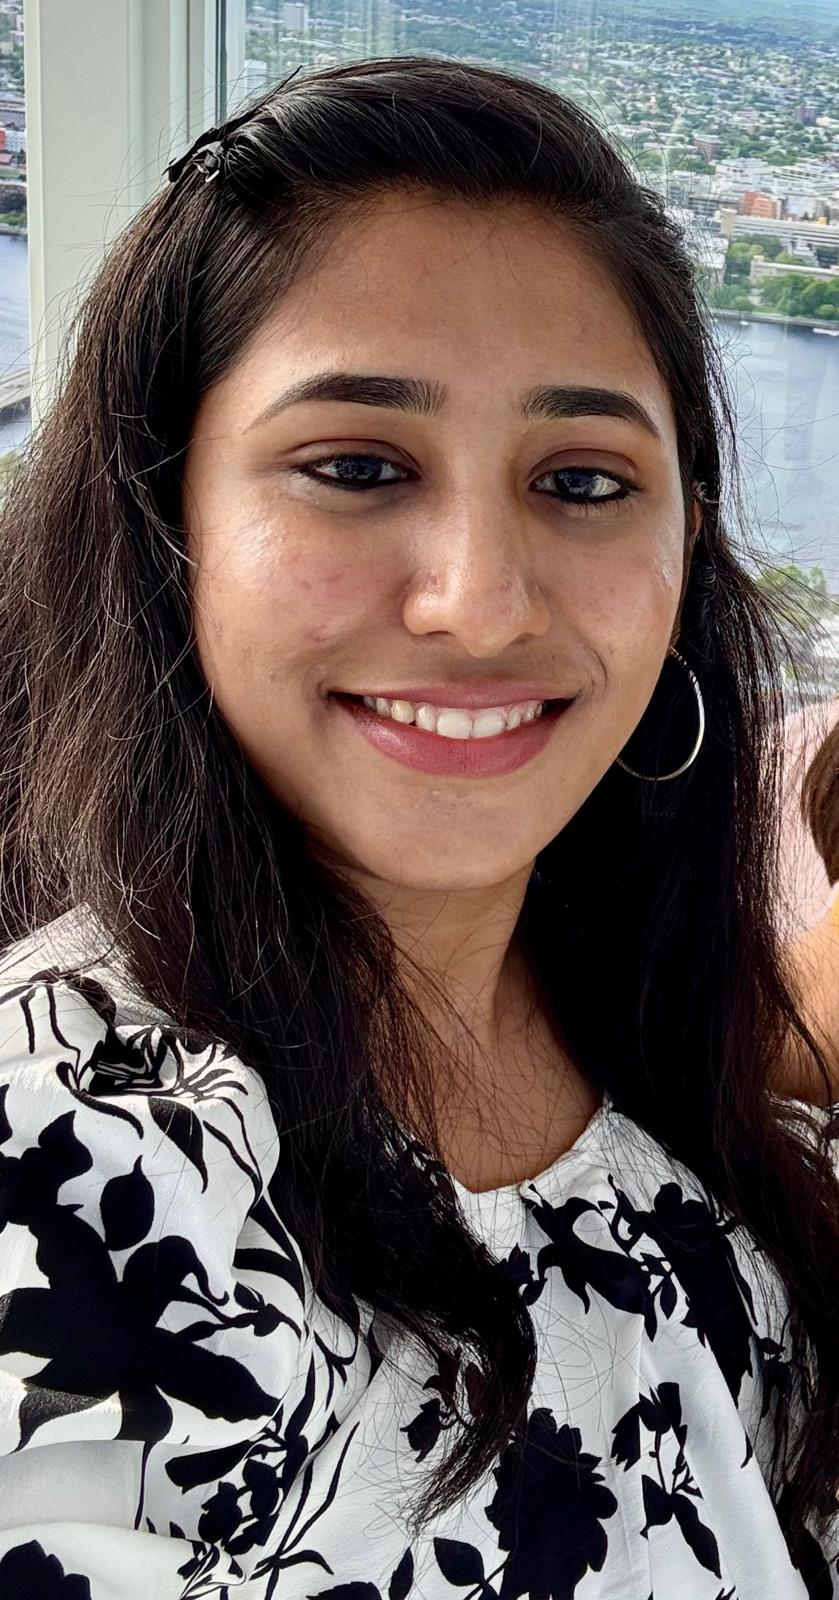

In [48]:
image


In [49]:
image=image.resize((64,64))

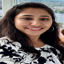

In [50]:
image

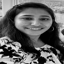

In [51]:
image=image.convert('L')
image

In [52]:
image_array= np.array(image).flatten()

In [53]:
image_array.shape

(4096,)

In [54]:
scaled_array=scaler.transform(image_array.reshape(1,-1))
#fit transform does z scale normalization z=x-mui/sigma

In [55]:
scaled_array

array([[ 1.17515831,  1.4390312 ,  1.87014507, ..., -0.10858327,
        -1.62266758, -0.6094126 ]])

In [56]:
model.predict(scaled_array)

array([1])

In [57]:
#save the model
import pickle


In [60]:
pickle.dump(model, open('my_model.pkl', 'wb'))
pickle.dump(scaler, open('my_model.pkl', 'wb'))         